In [1]:
import os, sys
from pathlib import Path

src_path = Path(os.getcwd()).resolve().parents[1]  
sys.path.append(str(src_path))

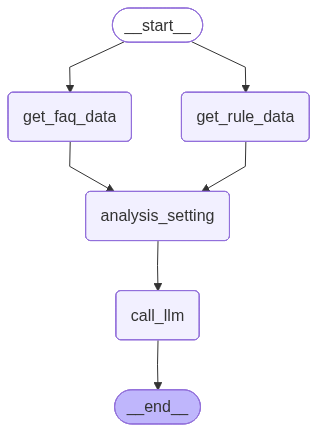

In [2]:
from agents.analysis.housing_faq_agent import housing_faq_graph
housing_faq_graph

In [5]:
invoke = housing_faq_graph.invoke({
    "start_input": {
        "target_area": "서울특별시 강남구 역삼동",
        "main_type":"84타입",
        "total_units":"120세대"
    }
})

In [10]:
print(invoke['housing_faq_output'].keys())
print(invoke['housing_faq_output']['housing_faq_context'])

dict_keys(['result', 'housing_faq_context', 'housing_rule_context'])
[Document(metadata={}, page_content='"Q1: 청약신청이 가능한 청약가능지역에는 어떤 곳들이 포함되나요?\\nA1: 청약가능지역에는 산업단지, 서울(수도권 거주자에 한함), 행정중심복합도시 예정지역, 도청이전신도시 개발예정지구, 혁신도시개발예정지구, 기업도시개발구역, 평택시 등, 조정대상지역(위축지역) 등이 포함됩니다. 이러한 지역에서 공급하는 주택은 해당 주택건설지역에 거주하지 않는 성년자도 공급대상에 포함될 수 있습니다. 이 내용은 제4조(주택의 공급대상) 제3항과 관련된 문서 내용에 기반합니다.\\n- [page_3.png, page_4.png]\\n\\nQ2: 행정구역 변경으로 주택건설지역이 변경되었을 때, 주택 공급대상에 포함될 수 있는 사람은 누구인가요?\\nA2: 행정구역의 변경으로 주택건설지역이 변경되는 경우, 변경 전의 주택건설지역 또는 그 중 일정한 구역에 거주하는 성년자를 공급대상에 포함하게 할 수 있습니다. 이는 특별시장, 광역시장, 특별자치시장, 시장 또는 군수가 결정할 수 있으며, 관련 내용은 문서에서 제3항에 명시되어 있습니다.\\n- [page_4.png]\\n\\nQ3: 수도권에 거주하는 성년자가 다른 주택건설지역의 주택을 공급받으려면 어떤 조건을 충족해야 하나요?\\nA3: 수도권에 거주하는 성년자가 다른 주택건설지역의 주택을 공급받으려면, 해당 지역이 청약가능지역으로 지정되어 있어야 합니다. 그러나, 청약가능지역에 거주한다고 해서 해당 주택건설지역 거주자와 동등하게 주택을 공급받을 기회가 주어지는 것은 아니며, 같은 순위에서는 해당 주택건설지역 거주자가 우선 공급받고 남은 주택이 있는 경우에만 주택을 공급받을 수 있습니다. 이 규정은 제4조(주택의 공급대상) 제3항에 따라 정해져 있습니다.\\n- [page_4.png]\\n\\nQ4: 청약신청 시 1인 1주택의 원칙이 적용되는

In [ ]:
mmd = housing_faq_graph.get_graph().draw_mermaid()
print(mmd)